## Linear Regression using pytorch

Linear regression is one of the must have tools in any data scientists toolkit. It attempts to fit the input data using a solution like:

* y is our measured output
* X is our input data, there are m measurements each of n values

Using linear regression we find coefficients &theta;<sub>0</sub> ... &theta;<sub>n</sub>

&#375; = &theta;<sub>0</sub> + &theta;<sub>1</sub>X<sub>1</sub> + &theta; <sub>2</sub>X<sub>2</sub> + ... + &theta;<sub>n</sub>X<sub>n</sub>

* &#375; is our predicted output

We minimize the error (loss function) between &#375; and y. A very common way is to minimize the squared distance between the each &#375; and y pair.

An example may help:

### We survey 10 people, based on 3 facts about a car we ask what would they pay

- m = 10  ( 10 samples of data )
- n = 3   ( 3 observations in each sample )

- X is m &times; n matrix
- y is a m &times; 1 matrix ( vector )

We want to find &theta;<sub>0</sub>, &theta;<sub>1</sub>, &theta;<sub>2</sub> & &theta;<sub>3</sub>.  That will allow us to find the price of any car (OK so we may need more than 3 things to really price a car but ... )

The 3 questions may be:

* Top speed in mph.
* Fuel consumption in mpg.
* Cargo capacity in cuft.

Let's consider some cases for out &theta;s

* &theta;<sub>0</sub>=10000.0   &theta;<sub>1</sub>=0.0    &theta;<sub>2</sub>=0.0    &theta;<sub>3</sub>=0.0
    - all cars would cost 10000, non of the three factors make any difference

* &theta;<sub>0</sub>= 1000.0   &theta;<sub>1</sub>=150.0  &theta;<sub>2</sub>=120.0  &theta;<sub>3</sub>=0.0
    - People like fast cars with low fuel consumption
        - cars with a top speed of 100mph, consuming 5mpg cost 1000 + 100&times;150 + 120&times;5 = 16,600 
        - cars with a top speed of 90mph, consuming 20mpg cost 1000 + 90&times;150 + 120&times;25 = 17,500 
        - cars with a top speed of 10mph, consuming 1mpg cost 1000 + 10&times;150 + 120&times;1 = 1,620 
    
That's linear regression!

In [1]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

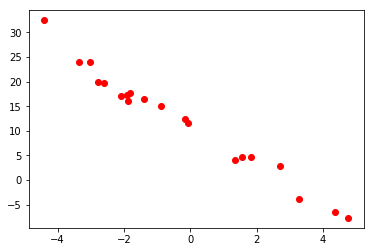

In [2]:
m = -4
c = 12
noisiness = 7
num_points = 20

x = ( torch.rand( num_points, 1 ) - 0.5 ) * 10
y = ( ( torch.rand( num_points, 1 ) - 0.5 ) * noisiness ) + ( x * m + c )

plt.scatter( x.tolist(), y.tolist(), color='red' )
plt.show()

We want to solve for 2 variables ( m & c ) so we have to synthesize a bias ( the c ). Bias is independent of the input data, so we'll prepend a column of ones to our input values ( x ).

if x is 
```
    1 
    2 
    3
```    
It will become 
```
    1    1 
    1    2 
    1    3
```

In [3]:
xplusone = torch.cat( ( torch.ones( x.size(0),1 ), x) , 1 ) 

Now we use the pytorch built-in solver [gels](https://pytorch.org/docs/stable/torch.html#torch.gels). This is the least squares solver. The returns includes two parts:
- the first n items are the co-officients we want
- the remainder are error terms

We have two dimensions ( the 1D x data and the prepended ones ), so read the first two items from the result. 

In [4]:
R, _ = torch.gels( y, xplusone )
R = R[0:xplusone.size(1)]  

Let's plot the original points and the best fit line. The best fit line comes from the co-efficients.

Multiply the original inputs by R ( the coefficients ) to get the line

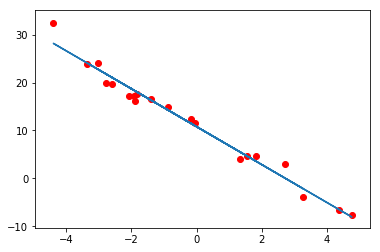

In [5]:
yh = xplusone.mm( R ) 
plt.plot( x.tolist(), yh.tolist() )
plt.scatter( x.tolist(), y.tolist(), color='red' )
plt.show()

### An example using more than one dimensional input

This example shows the method above works for higher dimensional data.

First define the x & y arrays of inputs and results

In [6]:
m = torch.tensor( [ [-2.0], [-2.0] ] )
c = 12
noisiness = 10
num_points = 100

x = ( torch.rand( num_points, 2 ) - 0.5 ) * 10
y = ( ( torch.rand( num_points, 1 ) - 0.5 ) * noisiness ) + ( x.mm( m ) + c )

Find the best fitting plane of the input data points. Compare the code to the 2D case above: it's the same.

In [7]:
xplusone = torch.cat( ( torch.ones( x.size(0),1 ), x) , 1 ) 
R, _ = torch.gels( y, xplusone )
R = R[0:xplusone.size(1)]  

yh = xplusone.mm( R ) 

Plot the results
It's harder to see a 3D plot. The red dots are the data points, the green plane is the best fit solution.

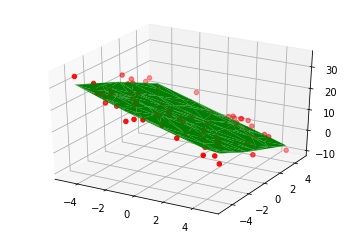

In [8]:
fig = plt.figure()
ax = fig.add_subplot( 111, projection='3d')

ax.scatter( x[:,0].tolist(), x[:,1].tolist(), y[:,0].tolist(), color='red' )
ax.plot_trisurf( x[:,0].tolist(), x[:,1].tolist(), yh[:,0].tolist(), color='green', shade=False )
plt.show()